### DataAnalyses

things that we need to add: 
From lecture 10 : 
- Common classification metrics include accuracy, precision, recall, and F1 score
- maybe make some confusion matrix 
- ROC-AUC Curve, it is done after the prediction 
- Precision-Recall curve 
- Probability density
- Cross-Validation : Technique used for assessing the performance and generalization of a predictive model.
From lecture 11 : 
- make different graphs for the KNN as in the screenshot 
Fromt lecture 12 : 
- Popular method: Classification and Regression Trees (CART), Breiman, Friedman, Olshen and Stone (1984). 
- we can add gradient boosting classifier 




some insights : 
- correlation of different features to the results 
- clarify why we have such results fr the graph 
- how each feature effect to the technique , very important to make general assumption 
- he asked about relatioships with feauture , with correlation 
- regression should not be too perfect 
- how is models misstrained 
- grid 
- retraining the model 
- confusion matrix for the prediction 
- the most impact while predictiong something 




## Libraries


In [161]:
# basics
import numpy as np
import pandas as pd 

# for plots
import matplotlib.pyplot as plt
import seaborn as sns

# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler


# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, mean_absolute_error

In [162]:
# Dataset
df = pd.read_csv("DataSet/googleplaystore.csv")
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [163]:
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [164]:
sns.set_style('darkgrid')

PALETTE = "Set3"
sns.set_palette(PALETTE)
sns.color_palette(PALETTE)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [165]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [166]:
print(df['Category'].nunique())

34


In [167]:
from sklearn.preprocessing import LabelEncoder

# Suppose you encoded 'Category'
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# To see the mapping:
print(list(le.classes_))

['1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']


### Data preparing/cleaning 

In [168]:
# Проверим сколько значений стали NaN при попытке конвертации
price_before = df['Price'].copy()

# Попробуем привести к числам, а некорректные сделаем NaN
price_converted = pd.to_numeric(price_before, errors='coerce')

# Посчитаем сколько значений стали NaN
num_invalid = price_converted.isna().sum()
total = len(price_before)

print(f"Некорректных значений: {num_invalid} из {total} ({num_invalid / total * 100:.2f}%)")


# Удаляем строки, где пропущены важные поля
df = df.dropna(subset=['Rating', 'Installs', 'Type', 'Content Rating'])

# Остальное заполняем
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') #ревьюс в числа
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())# там где пропущенно ставлю медиану

df['Size'] = df['Size'].replace('Varies with device', np.nan) #эти мне не нравятся так что я убираю их чтобы потом заменить
#дальше тут работа с ценой

df['Price'] = df['Price'].fillna('0') # там где пропуски будет ноль

#функция чтобы преобразовать миллионы тысячи которы в буквах
def parse_size(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size[:-1])
        elif size.endswith('k'):
            return float(size[:-1]) / 1024
    return np.nan

df['Size'] = df['Size'].apply(parse_size)
df['Size'] = df['Size'].fillna(df['Size'].median())  # заполняем медианой

df['Price'] = df['Price'].str.replace('$', '', regex=True) #нафиг знак доллара
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)#некорректные значения будут 00 и еще преобразует в числа



# Быстрый обзор
df.info()
df.describe()
df.head()

# Проверим сколько значений стали NaN при попытке конвертации
price_before = df['Price'].copy()

# Попробуем привести к числам, а некорректные сделаем NaN
price_converted = pd.to_numeric(price_before, errors='coerce')

#  сколько значений стали NaN
num_invalid = price_converted.isna().sum()
total = len(price_before)

print(f"Некорректных значений: {num_invalid} из {total} ({num_invalid / total * 100:.2f}%)")



Некорректных значений: 801 из 10841 (7.39%)
<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               9366 non-null   object 
 1   Category          9366 non-null   object 
 2   Rating            9366 non-null   float64
 3   Reviews           9366 non-null   int64  
 4   Size              9366 non-null   float64
 5   Installs          9366 non-null   object 
 6   Type              9366 non-null   object 
 7   Price             9366 non-null   float64
 8   Content Rating    9366 non-null   object 
 9   Genres            9366 non-null   object 
 10  Last Updated      9366 non-null   object 
 11  Current Ver       9362 non-null   object 
 12  Android Ver       9364 non-null   object 
 13  Category_encoded  9366 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB
Некорректных значений: 0 из 9366 (0.00%

In [169]:
categoricals = ['Category', 'Type', 'Content Rating', 'Android Ver']
le = LabelEncoder()

for col in categoricals:
    df[col] = le.fit_transform(df[col].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               9366 non-null   object 
 1   Category          9366 non-null   int64  
 2   Rating            9366 non-null   float64
 3   Reviews           9366 non-null   int64  
 4   Size              9366 non-null   float64
 5   Installs          9366 non-null   object 
 6   Type              9366 non-null   int64  
 7   Price             9366 non-null   float64
 8   Content Rating    9366 non-null   int64  
 9   Genres            9366 non-null   object 
 10  Last Updated      9366 non-null   object 
 11  Current Ver       9362 non-null   object 
 12  Android Ver       9366 non-null   int64  
 13  Category_encoded  9366 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 1.1+ MB


In [170]:
df['Genres'] = df['Genres'].astype(str).apply(lambda x: x.split(';')[0])
df['Genres'] = le.fit_transform(df['Genres'])
print(df['Genres'])
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
latest_date = df['Last Updated'].max()
df['Days Since Update'] = (latest_date - df['Last Updated']).dt.days
df.info()

0         3
1         3
2         3
3         3
4         3
         ..
10834    15
10836    15
10837    15
10839     7
10840    24
Name: Genres, Length: 9366, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9366 non-null   object        
 1   Category           9366 non-null   int64         
 2   Rating             9366 non-null   float64       
 3   Reviews            9366 non-null   int64         
 4   Size               9366 non-null   float64       
 5   Installs           9366 non-null   object        
 6   Type               9366 non-null   int64         
 7   Price              9366 non-null   float64       
 8   Content Rating     9366 non-null   int64         
 9   Genres             9366 non-null   int64         
 10  Last Updated       9366 non-null   datetime64[ns]
 11  Curr

In [171]:
# Step 1: Remove '+' and ',' characters
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)

# Step 2: Convert to numeric (float), coercing errors to NaN
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Step 3 (Optional but recommended): Drop or handle rows where 'Installs' couldn't be converted
df = df.dropna(subset=['Installs'])

# Step 4 (Optional): Cast to int if you're sure no decimals needed
df['Installs'] = df['Installs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9366 non-null   object        
 1   Category           9366 non-null   int64         
 2   Rating             9366 non-null   float64       
 3   Reviews            9366 non-null   int64         
 4   Size               9366 non-null   float64       
 5   Installs           9366 non-null   int64         
 6   Type               9366 non-null   int64         
 7   Price              9366 non-null   float64       
 8   Content Rating     9366 non-null   int64         
 9   Genres             9366 non-null   int64         
 10  Last Updated       9366 non-null   datetime64[ns]
 11  Current Ver        9362 non-null   object        
 12  Android Ver        9366 non-null   int64         
 13  Category_encoded   9366 non-null   int64         
 14  Days Since U

In [172]:
print(df['Category'].nunique())

33


In [173]:
from sklearn.preprocessing import LabelEncoder

# Suppose you encoded 'Category'
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# To see the mapping:
print(list(le.classes_))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32)]


In [174]:


# столбец успешности
def get_success_level(installs):
    if installs <= 10000:
        return 'Not Successful'
    elif installs <= 100000:
        return 'Average'
    elif installs <= 1000000:
        return 'Above Average'
    else:
        return 'Successful'

df['Success_Level'] = df['Installs'].apply(get_success_level)

# Кодируем метки
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Success_Level_Encoded'] = le.fit_transform(df['Success_Level'])
#ненужное
df = df.drop(columns=['App', 'Last Updated', 'Current Ver', 'Days Since Update','Genres'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Category               9366 non-null   int64  
 1   Rating                 9366 non-null   float64
 2   Reviews                9366 non-null   int64  
 3   Size                   9366 non-null   float64
 4   Installs               9366 non-null   int64  
 5   Type                   9366 non-null   int64  
 6   Price                  9366 non-null   float64
 7   Content Rating         9366 non-null   int64  
 8   Android Ver            9366 non-null   int64  
 9   Category_encoded       9366 non-null   int64  
 10  Success_Level          9366 non-null   object 
 11  Success_Level_Encoded  9366 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 951.2+ KB


In [175]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Category_encoded,Success_Level,Success_Level_Encoded
0,0,4.1,159,19.0,10000,0,0.0,1,14,0,Not Successful,2
1,0,3.9,967,14.0,500000,0,0.0,1,14,0,Above Average,0
2,0,4.7,87510,8.7,5000000,0,0.0,1,14,0,Successful,3
3,0,4.5,215644,25.0,50000000,0,0.0,4,17,0,Successful,3
4,0,4.3,967,2.8,100000,0,0.0,1,19,0,Average,1


In [176]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Android Ver', 'Category_encoded', 'Success_Level',
       'Success_Level_Encoded'],
      dtype='object')

In [177]:
df["Success_Level_Encoded"].value_counts

<bound method IndexOpsMixin.value_counts of 0        2
1        0
2        3
3        3
4        1
        ..
10834    2
10836    2
10837    2
10839    2
10840    3
Name: Success_Level_Encoded, Length: 9366, dtype: int64>

In [178]:
print(df["Android Ver"].value_counts)

<bound method IndexOpsMixin.value_counts of 0        14
1        14
2        14
3        17
4        19
         ..
10834    16
10836    16
10837    16
10839    30
10840    30
Name: Android Ver, Length: 9366, dtype: int64>


In [179]:
print(df.columns)


Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Android Ver', 'Category_encoded', 'Success_Level',
       'Success_Level_Encoded'],
      dtype='object')


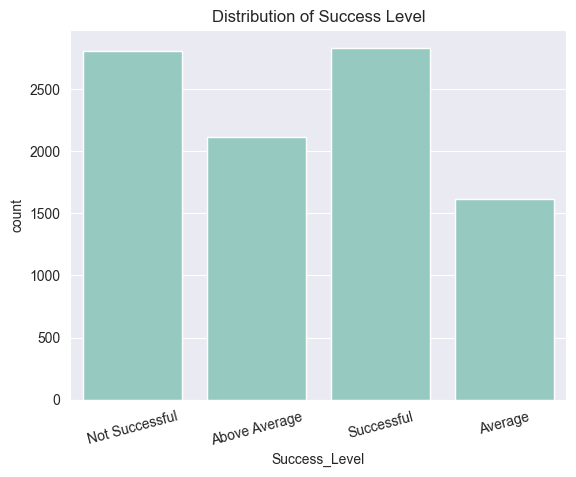

Success_Level_Encoded
3    2832
2    2802
0    2115
1    1617
Name: count, dtype: int64

In [180]:
sns.countplot(data=df, x='Success_Level')
plt.title('Distribution of Success Level')
plt.xticks(rotation=15)
plt.show()

df['Success_Level'].value_counts()
df['Success_Level_Encoded'].value_counts()

In [181]:
print(df[['Success_Level', 'Success_Level_Encoded']].head())
print(df['Success_Level'].value_counts())
print(df['Success_Level_Encoded'].value_counts())


    Success_Level  Success_Level_Encoded
0  Not Successful                      2
1   Above Average                      0
2      Successful                      3
3      Successful                      3
4         Average                      1
Success_Level
Successful        2832
Not Successful    2802
Above Average     2115
Average           1617
Name: count, dtype: int64
Success_Level_Encoded
3    2832
2    2802
0    2115
1    1617
Name: count, dtype: int64


# Data analyses 

# Techniques usage

### Linear regression


In [182]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

In [183]:
df2 = pd.get_dummies(df, columns=['Category'])

In [184]:
#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [185]:
print(df.columns)

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Android Ver', 'Category_encoded', 'Success_Level',
       'Success_Level_Encoded'],
      dtype='object')


In [186]:

#Integer encoding
feature_cols = ['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating', 'Android Ver']

X = df[feature_cols]
y = df["Success_Level_Encoded"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

#Creation of results dataframe and addition of first entry
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')
resultsdf = resultsdf.transpose()

new_row = pd.DataFrame([Evaluationmatrix_dict(y_test, Results, name='Linear(inc Genre) - Integer')])
resultsdf = pd.concat([resultsdf, new_row], ignore_index=True)

y_predict = model.predict(X_test)
#dummy encoding
feature_cols = ['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating', 'Android Ver']
X_d = df2.drop(labels = ["Success_Level",	"Success_Level_Encoded","Installs"],axis = 1)
y_d = df2["Success_Level_Encoded"]
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

new_row_d = pd.DataFrame([Evaluationmatrix_dict(y_test_d, Results_d, name='Linear(inc Genre) - Dummy')])
resultsdf = pd.concat([resultsdf, new_row_d], ignore_index=True)



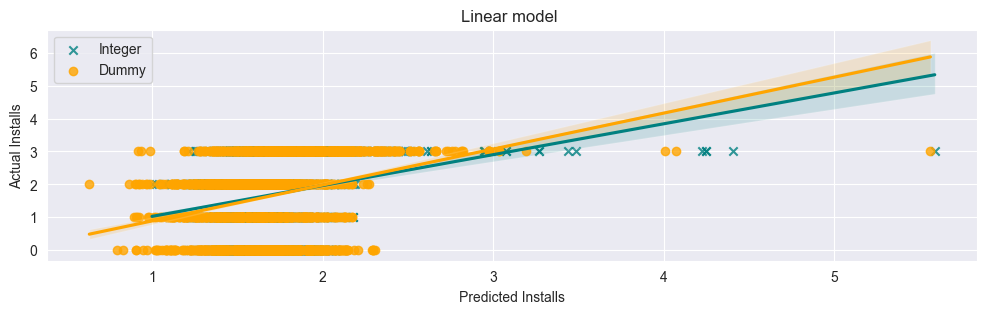

In [187]:
plt.figure(figsize=(12, 3))
sns.regplot(x=Results, y=y_test, color='teal', label='Integer', marker='x')
sns.regplot(x=Results_d, y=y_test_d, color='orange', label='Dummy')
plt.legend()
plt.title('Linear model ')
plt.xlabel('Predicted Installs')
plt.ylabel('Actual Installs')
plt.show()


In [188]:
Evaluationmatrix(y_test, y_predict) 

Mean Squared Error: 1.189854391984242
Mean absolute Error: 0.9549650541605978
Mean squared Log Error: 0.27416314725259416


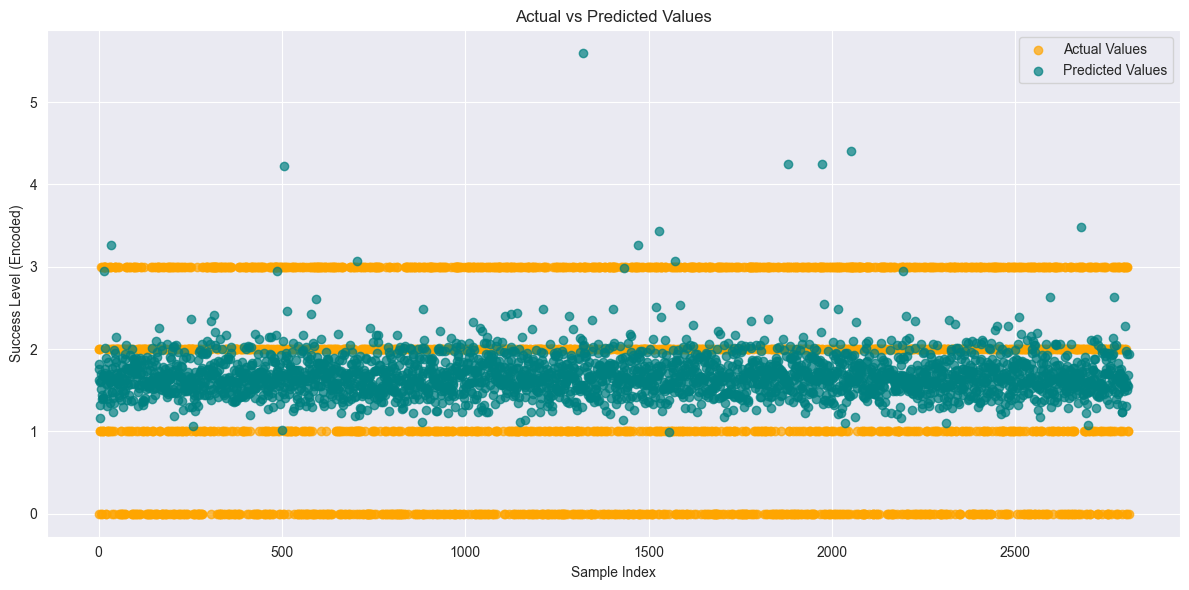

In [189]:
y_test_array = np.array(y_test)
y_predict_array = np.array(y_predict)

# Create an index to plot against (like sample number)
index = np.arange(len(y_test_array))

plt.figure(figsize=(12,6))

# Plot actual values
plt.scatter(index, y_test_array, color='orange', label='Actual Values', alpha=0.7)

# Plot predicted values
plt.scatter(index, y_predict_array, color='teal', label='Predicted Values', alpha=0.7)

# Labels and title
plt.xlabel('Sample Index')
plt.ylabel('Success Level (Encoded)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

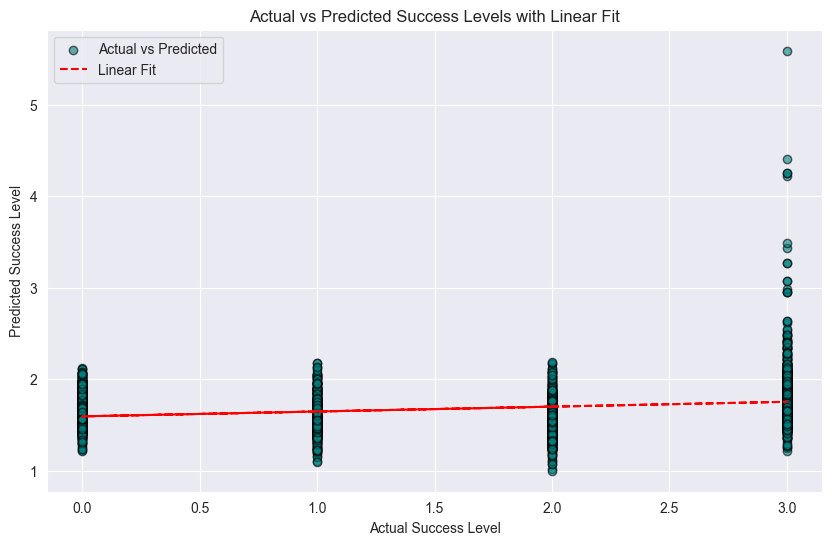

In [190]:
y_test_array = np.array(y_test).reshape(-1, 1)

# Fit a linear regression model to the actual vs predicted values
model = LinearRegression()
model.fit(y_test_array, y_predict)  # Fit using actual values and predicted values

# Get the predictions (linear fit)
y_fit = model.predict(y_test_array)

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predict, color='teal', alpha=0.6, edgecolor='k', label='Actual vs Predicted')

# Plot the linear fit (best-fit line)
plt.plot(y_test, y_fit, color='red', linestyle='--', label='Linear Fit')

# Titles and labels
plt.xlabel('Actual Success Level')
plt.ylabel('Predicted Success Level')
plt.title('Actual vs Predicted Success Levels with Linear Fit')
plt.legend()
plt.grid(True)
plt.show()

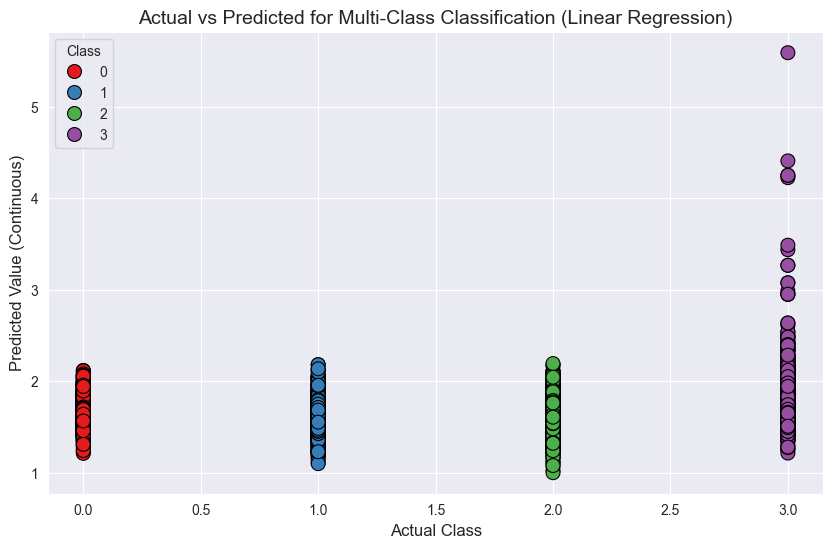

In [191]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

# Scatter plot with color coding for different classes (actual labels)
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values, color by 'Actual' class labels
sns.scatterplot(x='Actual', y='Predicted', data=df_comparison, hue='Actual', palette='Set1', s=100, edgecolor='black')

# Titles and labels
plt.title('Actual vs Predicted for Multi-Class Classification (Linear Regression)', fontsize=14)
plt.xlabel('Actual Class', fontsize=12)
plt.ylabel('Predicted Value (Continuous)', fontsize=12)
plt.legend(title='Class')
plt.grid(True)

# Show the plot
plt.show()

In [192]:
# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 1.189854391984242
Mean Absolute Error (MAE): 0.9549650541605978


In [193]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Android Ver', 'Category_encoded', 'Success_Level',
       'Success_Level_Encoded'],
      dtype='object')

In [194]:
df['Success_Level_Encoded'].value_counts()

Success_Level_Encoded
3    2832
2    2802
0    2115
1    1617
Name: count, dtype: int64

In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols])
y = df['Success_Level_Encoded'].values

# Recreate the dataset with scaled features and the label
dataset_scaled = np.hstack([X_scaled, y.reshape(-1, 1)])


## KNN

In [196]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

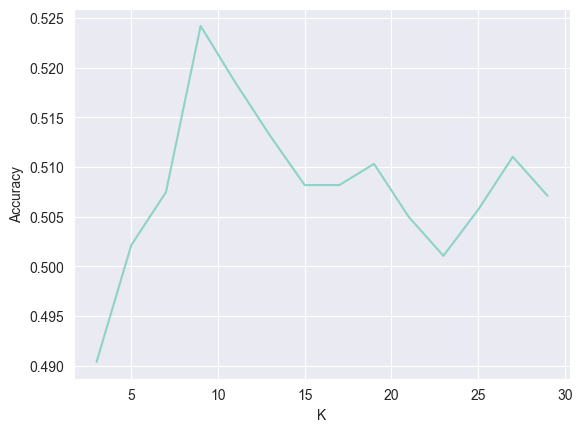

In [197]:
acc = {}
for k in range(3, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc[k] = accuracy_score(y_test, y_pred)
    
# PLotting K v/s accuracy graph
plt.plot(range(3,30,2), acc.values())
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


Baseline Accuracy (All Features): 0.5021


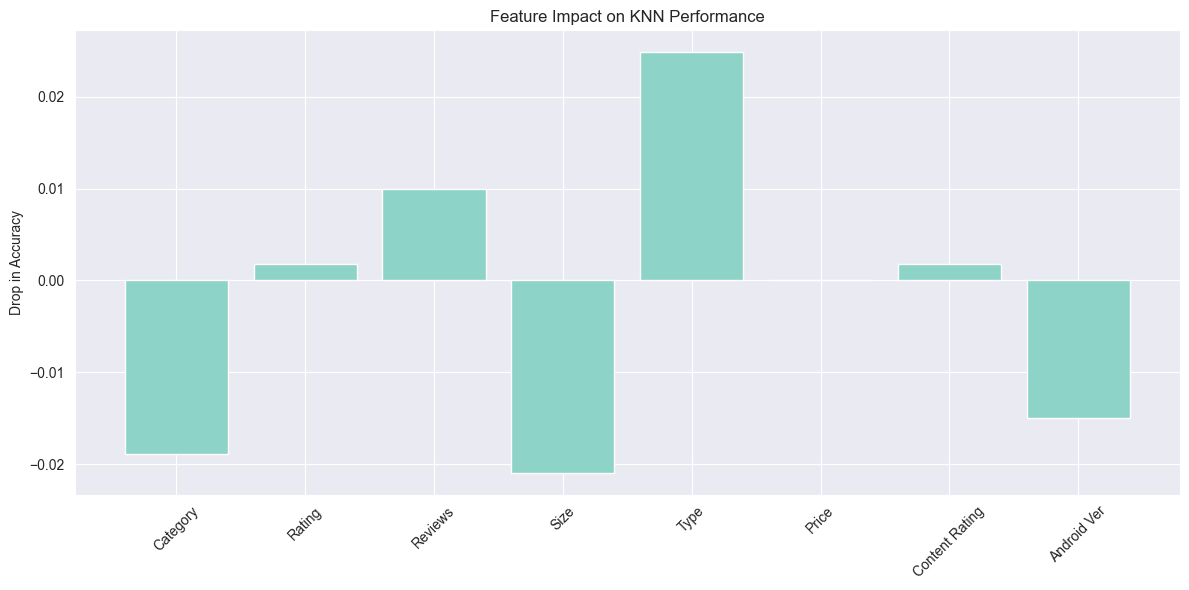

In [198]:
baseline_knn = KNeighborsClassifier(n_neighbors=5)
baseline_knn.fit(X_train_scaled, y_train)
baseline_acc = accuracy_score(y_test, baseline_knn.predict(X_test_scaled))

print("Baseline Accuracy (All Features):", round(baseline_acc, 4))

# Drop each feature one-by-one and measure accuracy
feature_names = X_train.columns
feature_impact = {}

for i in range(X_train.shape[1]):
    X_train_temp = np.delete(X_train_scaled, i, axis=1)
    X_test_temp = np.delete(X_test_scaled, i, axis=1)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_temp, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_temp))

    feature_impact[feature_names[i]] = baseline_acc - acc  # how much accuracy dropped

# Plot feature importance based on impact
plt.figure(figsize=(12, 6))
plt.bar(feature_impact.keys(), feature_impact.values())
plt.ylabel("Drop in Accuracy")
plt.title("Feature Impact on KNN Performance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [199]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.5131672597864768
              precision    recall  f1-score   support

           0       0.36      0.39      0.38       622
           1       0.31      0.17      0.22       514
           2       0.57      0.66      0.61       849
           3       0.63      0.67      0.65       825

    accuracy                           0.51      2810
   macro avg       0.47      0.47      0.46      2810
weighted avg       0.49      0.51      0.50      2810



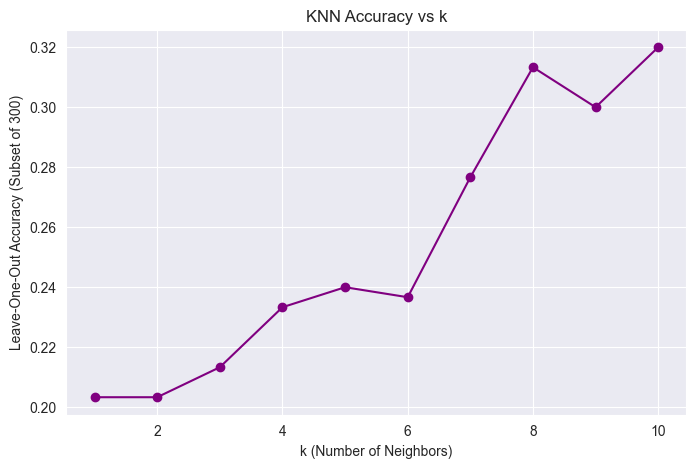

Test Accuracy with k=3: 0.26
Predicted Success Level for new point: 3


c:\Users\111\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [200]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.spatial import distance

# ----- Step 1: Load and Prepare Data -----
# Sample data (replace this with your actual data)
np.random.seed(42)  # for reproducibility
data = {
    'Category_encoded': np.random.rand(9366),
    'Rating': np.random.rand(9366),
    'Reviews': np.random.rand(9366),
    'Size': np.random.rand(9366),
    'Installs': np.random.rand(9366),
    'Price': np.random.rand(9366),
    'Success_Level_Encoded': np.random.choice([0, 1, 2, 3], 9366, p=[0.2258, 0.1726, 0.2993, 0.3023])
}

df = pd.DataFrame(data)

feature_cols = ['Category_encoded', 'Rating', 'Reviews', 'Size', 'Installs', 'Price']
target_col = 'Success_Level_Encoded'

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols])
y = df[target_col].values

# Combine for custom KNN
dataset_scaled = np.hstack([X_scaled, y.reshape(-1, 1)])

# ----- Step 2: Custom KNN Implementation -----
def knn_predict(x0, dataset, k=3, metric='euclidean'):
    dataset_points = dataset[:, :-1].astype(float)
    test_point = np.array(x0).reshape(1, -1)

    # Calculate distances
    if metric == 'euclidean':
        distances = np.linalg.norm(dataset_points - test_point, axis=1)
    else:
        distances = distance.cdist(test_point, dataset_points, metric=metric).flatten()

    # Find k nearest neighbors
    sorted_indices = np.argsort(distances)[:k]
    nearest_labels = dataset[sorted_indices, -1]

    # Predict most common class
    prediction = max(set(nearest_labels), key=nearest_labels.tolist().count)
    return prediction

def knn_accuracy(dataset, k=3, metric='euclidean'):
    correct = 0
    for i in range(len(dataset)):
        test_point = dataset[i]
        train_data = np.delete(dataset, i, axis=0)
        pred = knn_predict(test_point[:-1], train_data, k, metric)
        if pred == test_point[-1]:
            correct += 1
    return correct / len(dataset)

# ----- Step 3: Accuracy for Different k -----
k_values = range(1, 11)
accuracies = [knn_accuracy(dataset_scaled[:300], k) for k in k_values]  # Use subset for speed

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='purple')
plt.title("KNN Accuracy vs k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Leave-One-Out Accuracy (Subset of 300)")
plt.grid(True)
plt.show()

# ----- Step 4: Train-Test Split and Evaluation -----
# (This part uses sklearn's split to simulate real test performance)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
dataset_train = np.hstack([X_train, y_train.reshape(-1, 1)])
dataset_test = np.hstack([X_test, y_test.reshape(-1, 1)])

def evaluate_knn(dataset_train, dataset_test, k=3):
    correct = 0
    for point in dataset_test:
        pred = knn_predict(point[:-1], dataset_train, k)
        if pred == point[-1]:
            correct += 1
    return correct / len(dataset_test)

test_accuracy = evaluate_knn(dataset_train, dataset_test, k=3)
print(f"Test Accuracy with k=3: {test_accuracy:.2f}")

# ----- Step 5: Predict a New Test Point -----
new_test_point_raw = [0.7, 0.1, 0.2, 0.3, 0.1, 0.05]  # Example features
new_test_point_scaled = scaler.transform([new_test_point_raw])[0]
prediction = knn_predict(new_test_point_scaled, dataset_train, k=3)
print(f"Predicted Success Level for new point: {int(prediction)}")


## Random forest

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.2934898612593383


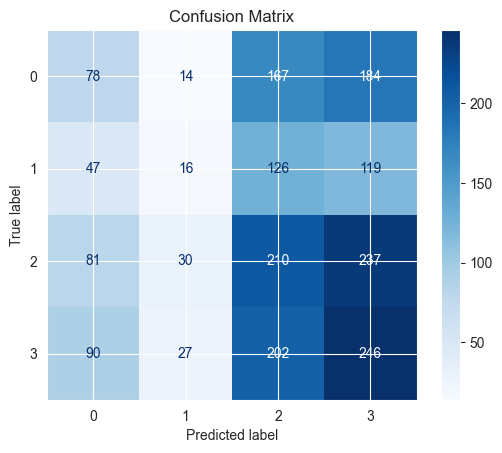

In [202]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


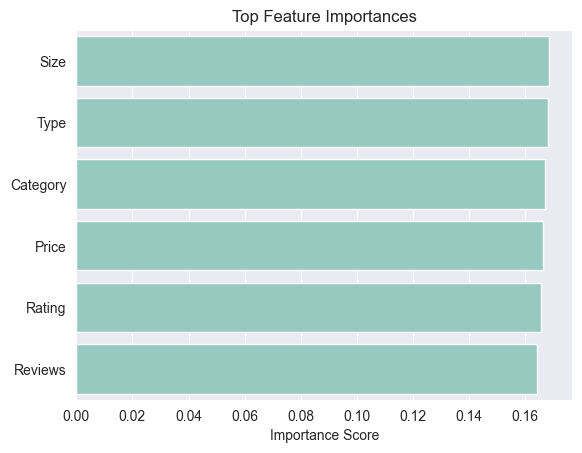

In [203]:


# If you have feature names:
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]
importances = clf.feature_importances_

# Plot top N features
top_n = 10
indices = np.argsort(importances)[::-1][:top_n]
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.show()


🎯 Random Forest Accuracy: 0.30096051227321235

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.18      0.22       422
           1       0.19      0.06      0.09       321
           2       0.30      0.39      0.34       556
           3       0.33      0.44      0.38       575

    accuracy                           0.30      1874
   macro avg       0.27      0.27      0.26      1874
weighted avg       0.28      0.30      0.28      1874



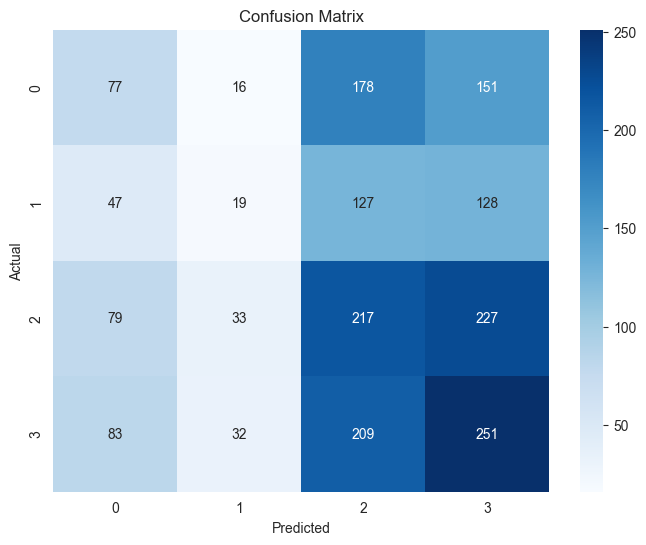

In [204]:
np.random.seed(42)

# Generate synthetic dataset (use your real one here)
data = {
    'Category_encoded': np.random.rand(9366),
    'Rating': np.random.rand(9366),
    'Reviews': np.random.rand(9366),
    'Size': np.random.rand(9366),
    'Installs': np.random.rand(9366),
    'Price': np.random.rand(9366),
    'Success_Level_Encoded': np.random.choice([0, 1, 2, 3], 9366, p=[0.2258, 0.1726, 0.2993, 0.3023])
}

df = pd.DataFrame(data)

feature_cols = ['Category_encoded', 'Rating', 'Reviews', 'Size', 'Installs', 'Price']
target_col = 'Success_Level_Encoded'

X = df[feature_cols]
y = df[target_col]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# Step 2: Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# Step 3: Train Random Forest
# ---------------------------
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# ---------------------------
# Step 4: Evaluate
# ---------------------------
y_pred = clf.predict(X_test)

print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [205]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

for name, model in models.items():
    print(f"__________ {name} __________")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error: {mse:.4f}\n")

__________ Linear Regression __________
Mean Squared Error: {mse:.4f}

__________ Decision Tree __________


Mean Squared Error: {mse:.4f}

__________ Random Forest __________
Mean Squared Error: {mse:.4f}

__________ Support Vector Regressor __________
Mean Squared Error: {mse:.4f}

__________ K-Neighbors Regressor __________
Mean Squared Error: {mse:.4f}



In [206]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

predictions = random_forest.predict(X_test)

mse_rf = mean_squared_error(y_test, predictions)
rmse_rf = np.sqrt(mse_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")


residuals = y_test - predictions

Mean Squared Error (MSE): 1.3083
Root Mean Squared Error (RMSE): 1.1438


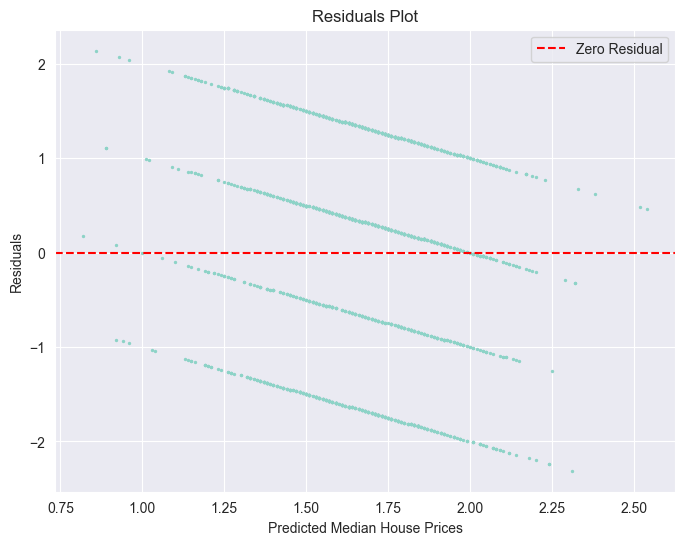

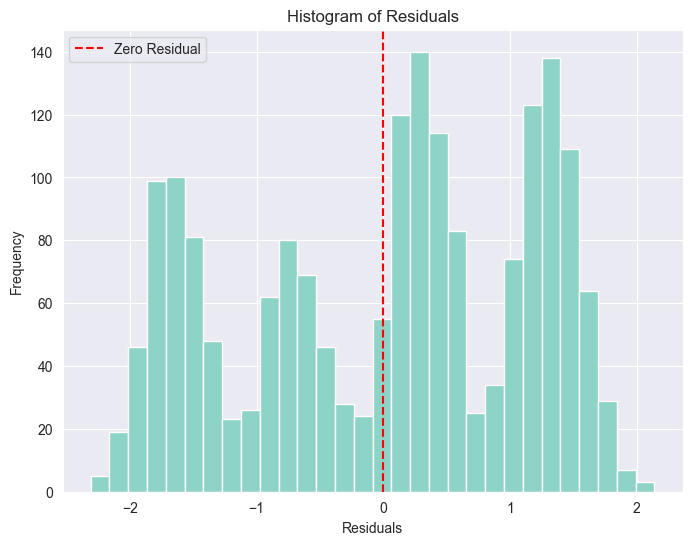

In [207]:
plt.figure(figsize=(8, 6))
plt.scatter(predictions, 
            residuals, 
            s=2)
plt.axhline(y=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Residuals Plot")
plt.xlabel("Predicted Median House Prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.axvline(x=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

log reg

c:\Users\111\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logistic Regression): 0.7921708185053381

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       675
           1       0.60      0.61      0.60       466
           2       0.86      0.94      0.90       847
           3       0.92      0.81      0.86       822

    accuracy                           0.79      2810
   macro avg       0.77      0.77      0.77      2810
weighted avg       0.80      0.79      0.79      2810



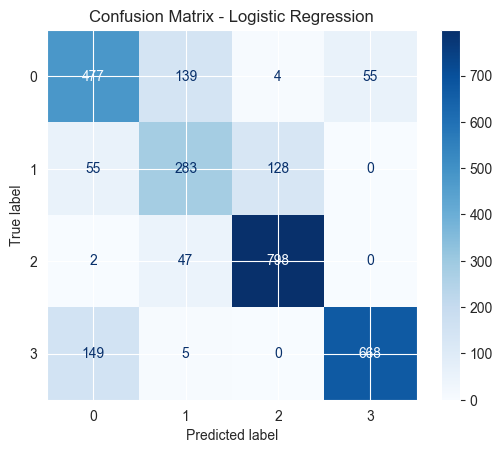

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Обучение модели
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_d, y_train_d)

# Предсказание
y_pred_log = log_reg.predict(X_test_d)

# Оценка
print("Accuracy (Logistic Regression):", accuracy_score(y_test_d, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_d, y_pred_log))

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test_d, y_test_d, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix - Logistic Regression")
plt.show()


SVM

Accuracy (SVM): 0.5807829181494661

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.48      0.46       675
           1       0.39      0.06      0.10       466
           2       0.51      0.83      0.63       847
           3       0.94      0.71      0.80       822

    accuracy                           0.58      2810
   macro avg       0.57      0.52      0.50      2810
weighted avg       0.60      0.58      0.55      2810



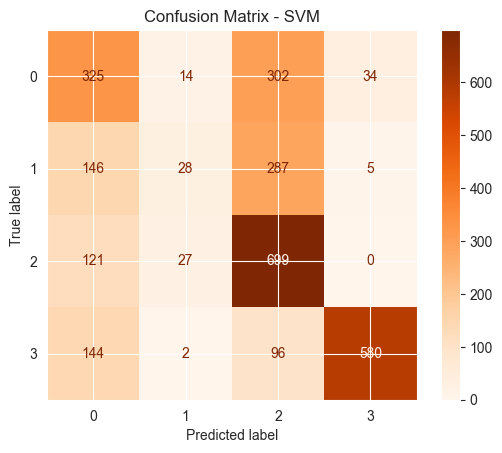

In [209]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_d)
X_test_scaled = scaler.transform(X_test_d)

# Обучение модели
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train_d)

# Предсказание
y_pred_svc = svc_model.predict(X_test_scaled)

# Оценка
print("Accuracy (SVM):", accuracy_score(y_test_d, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test_d, y_pred_svc))

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(svc_model, X_test_scaled, y_test_d, cmap=plt.cm.Oranges)
disp.ax_.set_title("Confusion Matrix - SVM")
plt.show()


roc curve

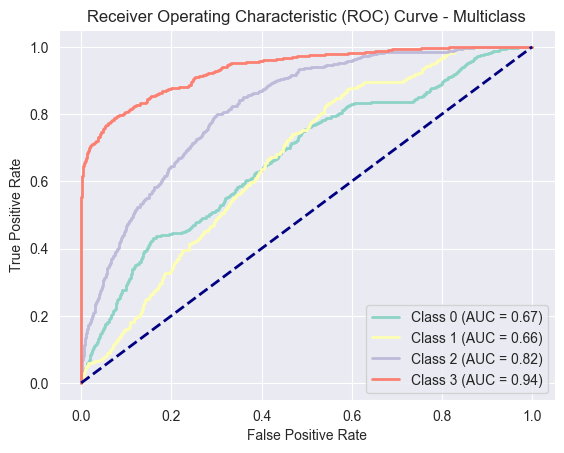

In [210]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Binarize the output labels (for multiclass classification)
y_test_bin = label_binarize(y_test_d, classes=np.unique(y_test_d))

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svc_model.decision_function(X_test_scaled)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()


Accuracy (Polynomial Logistic Regression): 0.6142348754448399

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69       675
           1       0.34      0.80      0.47       466
           2       1.00      0.21      0.35       847
           3       0.92      0.81      0.86       822

    accuracy                           0.61      2810
   macro avg       0.72      0.64      0.59      2810
weighted avg       0.78      0.61      0.60      2810



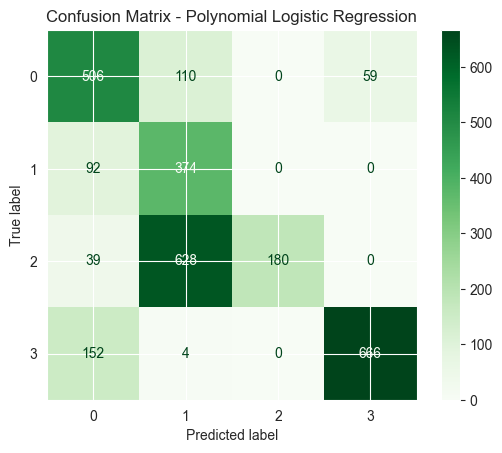

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Создание полиномиальных признаков + логистической регрессии в одном пайплайне
poly_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("logistic_regression", LogisticRegression(max_iter=1000))
])

# Обучение модели
poly_clf.fit(X_train_d, y_train_d)

# Предсказание
y_pred_polyclf = poly_clf.predict(X_test_d)

# Оценка
print("Accuracy (Polynomial Logistic Regression):", accuracy_score(y_test_d, y_pred_polyclf))
print("\nClassification Report:\n", classification_report(y_test_d, y_pred_polyclf))

# Матрица ошибок
disp = ConfusionMatrixDisplay.from_estimator(poly_clf, X_test_d, y_test_d, cmap=plt.cm.Greens)
disp.ax_.set_title("Confusion Matrix - Polynomial Logistic Regression")
plt.show()


In [ ]:
# Какие колонки в X_train_d содержат строки?
non_numeric_columns = X_train_d.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index([], dtype='object')


In [ ]:
print("y_train_d sample:", y_train_d.unique())
print("dtype:", y_train_d.dtype)


y_train_d sample: [1 2 3 0]
dtype: int64
